# Table of contents
*  [Introduction](#section1) 
*  [Read in the data](#section2)
*  [Testing different # of neurons](#section3)
    - [Performance](#section4)
*  [Cross validation](#section5)
    - [Visualizing weights](#section6)

by @samaxtech

---

<a id='section1'></a>
# Introduction
This project aims to build a handwritten digits classifier by implementing and testing different Multilayer Perceptrons. 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

---
<a id='section2'></a>
# Read in the data

In [19]:
digits = load_digits()
print(digits.data.shape)

# Transform to Pandas df
digits_df = pd.DataFrame(digits.data)

X_train = digits_df.iloc[:len(digits.images)//2]
y_train = digits.target[:len(digits.images) // 2]

X_test = digits_df.iloc[len(digits.images)//2:]
y_test = digits.target[len(digits.images) // 2:]

digits_df.head()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


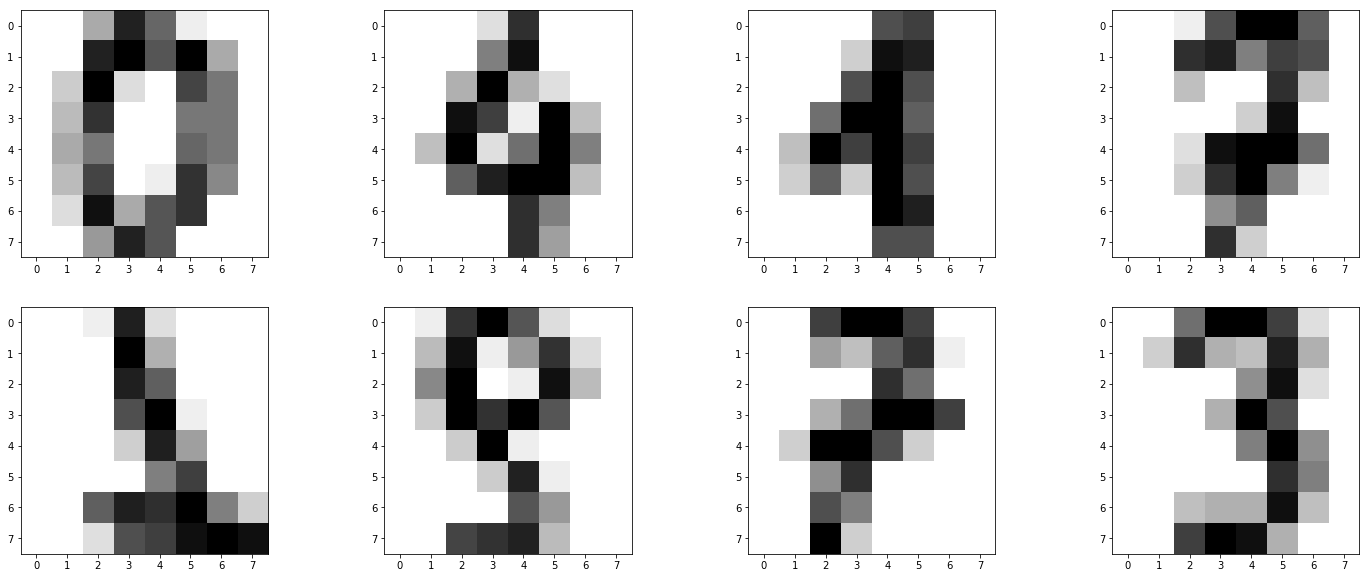

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes.flatten()

idxs = [0, 100, 200, 300, 1000, 1100, 1200, 1300]
images = digits_df.iloc[idxs]
n_pixel = images.shape[1]
s_size = int(np.sqrt(n_pixel))

ax1.imshow(images.iloc[0].values.reshape(s_size, s_size), cmap='gray_r')
ax2.imshow(images.iloc[1].values.reshape(s_size, s_size), cmap='gray_r')
ax3.imshow(images.iloc[2].values.reshape(s_size, s_size), cmap='gray_r')
ax4.imshow(images.iloc[3].values.reshape(s_size, s_size), cmap='gray_r')
ax5.imshow(images.iloc[4].values.reshape(s_size, s_size), cmap='gray_r')
ax6.imshow(images.iloc[5].values.reshape(s_size, s_size), cmap='gray_r')
ax7.imshow(images.iloc[6].values.reshape(s_size, s_size), cmap='gray_r')
ax8.imshow(images.iloc[7].values.reshape(s_size, s_size), cmap='gray_r')

plt.show()

<a id='section3'></a>
# Testing different # of hidden layers

In [21]:
neurons = [8, 16, 32, 64, 128, 256]
nn_accuracies_test = []
nn_accuracies_train = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n), activation='logistic')
    
    mlp.fit(X_train, y_train)
    nn_predictions_test = mlp.predict(X_test)
    nn_predictions_train = mlp.predict(X_train)
    
    accuracy_train = accuracy_score(y_train, nn_predictions_train)
    accuracy_test = accuracy_score(y_test, nn_predictions_test)
    
    nn_accuracies_train.append(accuracy_train)
    nn_accuracies_test.append(accuracy_test)

print("Train:\n", nn_accuracies_train)
print("\nTest:\n", nn_accuracies_test)

Train:
 [0.88864142538975499, 0.98997772828507791, 0.99888641425389757, 1.0, 1.0, 1.0]

Test:
 [0.75083426028921019, 0.89321468298109008, 0.93214682981090102, 0.94104560622914346, 0.94883203559510565, 0.9477196885428254]


---
The model clearly tends to overfit as we increase the number of hidden layers and neurons on each layer.

<a id='section4'></a>
## Performance

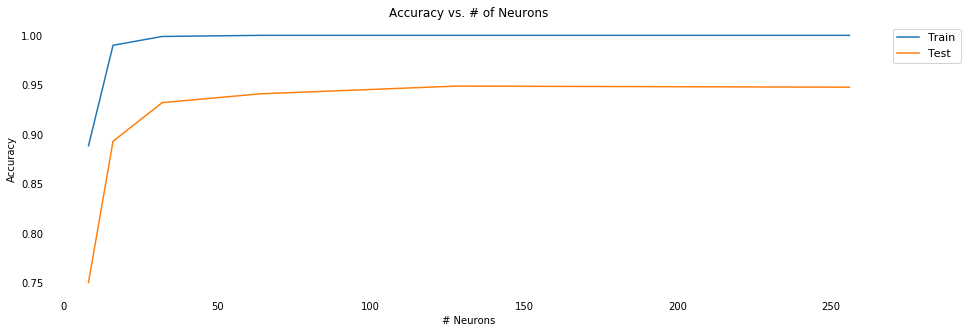

In [22]:
acc = [nn_accuracies_train, nn_accuracies_test]
fig, ax = plt.subplots(1, figsize=(15, 5))

for a in acc:
    ax.plot(neurons, a)
    
ax.set_title('Accuracy vs. # of Neurons')
ax.set_xlabel('# Neurons')
ax.set_ylabel('Accuracy')
ax.legend(['Train', 'Test'], bbox_to_anchor=(1, 1), prop={'size': 11})
ax.tick_params(top="off", left="off", right="off", bottom='off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

<a id='section5'></a>
# Cross validation

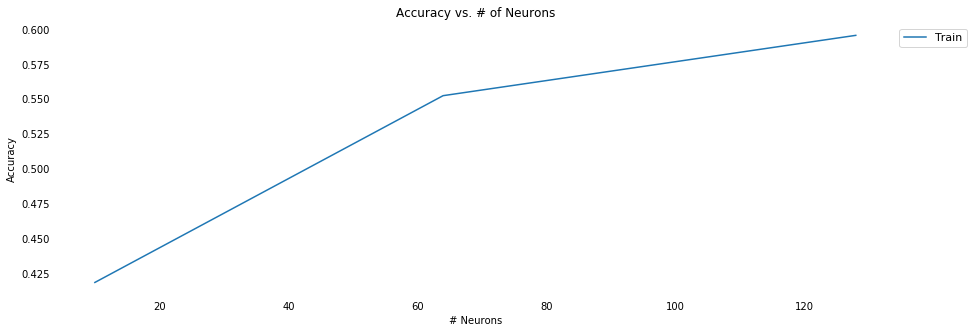

In [34]:
def cv_nn_classifier(n_neuron, n_hidden_layer):
    # 6-fold cross validation
    kf = KFold(n_splits=6, shuffle=True, random_state=1)
    mlp = MLPClassifier(hidden_layer_sizes=(n_neuron, n_hidden_layer), activation='logistic')
    
    accuracies = cross_val_score(mlp, X_train, y_train, scoring='accuracy', cv=kf)
    avg_acc = np.mean(accuracies)
    
    return avg_acc


# Test different # of neurons for 3 hidden layers
neurons = [10, 64, 128]
X = digits.data
y = digits.target
acc = []

for n in neurons:
    acc.append(cv_nn_classifier(n, 3))
    
# ------------------------------------------------------------------------------------------
# Plot results
# ------------------------------------------------------------------------------------------
fig, ax = plt.subplots(1, figsize=(15, 5))
ax.plot(neurons, acc)

ax.set_title('Accuracy vs. # of Neurons')
ax.set_xlabel('# Neurons')
ax.set_ylabel('Accuracy')
ax.legend(['Train', 'Test'], bbox_to_anchor=(1, 1), prop={'size': 11})
ax.tick_params(top="off", left="off", right="off", bottom='off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

<a id='section6'></a>
## Visualizing weights

Layer 1 - Weights


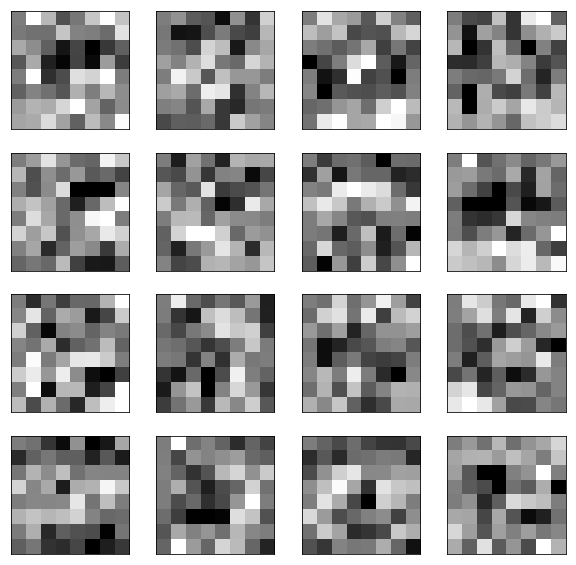

Layer 2 - Weights


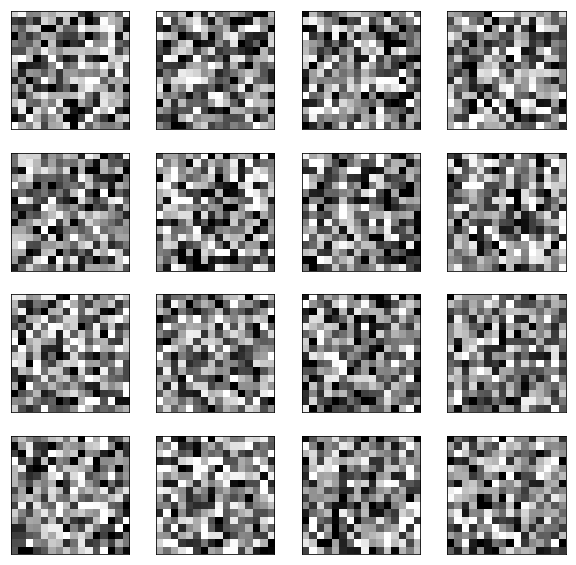

Layer 3 - Weights


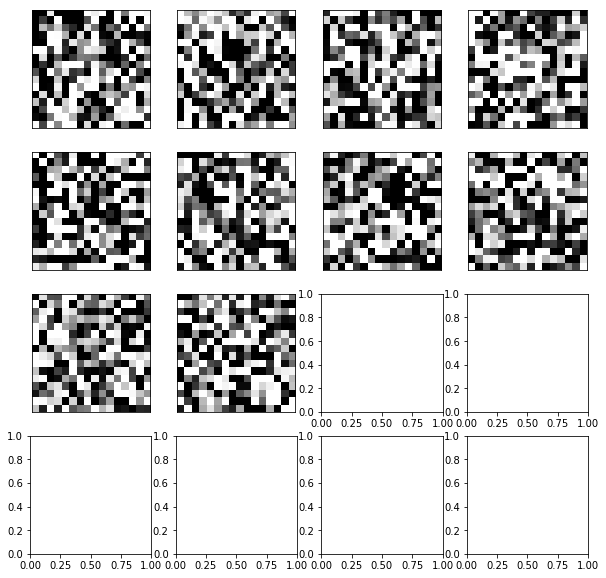

In [79]:
# First layer
for layer in range(0, 3):
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    vmin, vmax = mlp.coefs_[layer].min(), mlp.coefs_[layer].max()
    s_size = int(np.sqrt(mlp.coefs_[layer].shape[0]))
    
    for coef, ax in zip(mlp.coefs_[layer].T, axes.ravel()):
        ax.matshow(coef.reshape(s_size, s_size), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
        ax.set_xticks(())
        ax.set_yticks(())
        
    print("Layer {} - Weights".format(layer + 1))
    plt.show()